# Car Insurance Claim Prediction Project

<center><img src="car.jpg" width=500></center>

---

Insurance companies invest a lot of time and money into optimizing their pricing and accurately estimating the likelihood that customers will make a claim. In many countries, car insurance is a legal requirement to drive a vehicle on public roads, so the market is very large!

[Source: Accenture Machine Learning in Insurance](https://www.accenture.com/_acnmedia/pdf-84/accenture-machine-leaning-insurance.pdf)

On the Road car insurance has requested your services to build a model to predict whether a customer will make a claim during the policy period. As they have little expertise and infrastructure for deploying and monitoring machine learning models, they've asked you to identify the single feature that results in the best performing model (measured by accuracy) so they can start with a simple model in production.

They have supplied customer data as a CSV file called `car_insurance.csv`, along with a table detailing the column names and descriptions below.



## The dataset

| Column | Description |
|--------|-------------|
| `id` | Unique client identifier |
| `age` | Client's age: <br> <ul><li>`0`: 16-25</li><li>`1`: 26-39</li><li>`2`: 40-64</li><li>`3`: 65+</li></ul> |
| `gender` | Client's gender: <br> <ul><li>`0`: Female</li><li>`1`: Male</li></ul> |
| `driving_experience` | Years the client has been driving: <br> <ul><li>`0`: 0-9</li><li>`1`: 10-19</li><li>`2`: 20-29</li><li>`3`: 30+</li></ul> |
| `education` | Client's level of education: <br> <ul><li>`0`: No education</li><li>`1`: High school</li><li>`2`: University</li></ul> |
| `income` | Client's income level: <br> <ul><li>`0`: Poverty</li><li>`1`: Working class</li><li>`2`: Middle class</li><li>`3`: Upper class</li></ul> |
| `credit_score` | Client's credit score (between zero and one) |
| `vehicle_ownership` | Client's vehicle ownership status: <br><ul><li>`0`: Does not own their vehilce (paying off finance)</li><li>`1`: Owns their vehicle</li></ul> |
| `vehcile_year` | Year of vehicle registration: <br><ul><li>`0`: Before 2015</li><li>`1`: 2015 or later</li></ul> |
| `married` | Client's marital status: <br><ul><li>`0`: Not married</li><li>`1`: Married</li></ul> |
| `children` | Client's number of children |
| `postal_code` | Client's postal code | 
| `annual_mileage` | Number of miles driven by the client each year |
| `vehicle_type` | Type of car: <br> <ul><li>`0`: Sedan</li><li>`1`: Sports car</li></ul> |
| `speeding_violations` | Total number of speeding violations received by the client | 
| `duis` | Number of times the client has been caught driving under the influence of alcohol |
| `past_accidents` | Total number of previous accidents the client has been involved in |
| `outcome` | Whether the client made a claim on their car insurance (response variable): <br><ul><li>`0`: No claim</li><li>`1`: Made a claim</li></ul> |

### Goal is to know which feature is best at prediciting outcome

---

## 1. Data Import & Initial Exploration

In [54]:
# Import required libraries
import pandas as pd
import numpy as np
from statsmodels.formula.api import logit

# Load the dataset
car_insurance = pd.read_csv('car_insurance.csv')
# Preview the data
car_insurance.head()

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,569520,3,0,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,0,1,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,0,0,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,0,1,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,1,1,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [55]:
# Check data types, missing values, and value counts
print('Columns:', car_insurance.columns.tolist())
print('Data types:', car_insurance.dtypes) 
print('Missing values:', car_insurance.isna().sum())
print('Value counts:')
print(car_insurance.value_counts())

Columns: ['id', 'age', 'gender', 'driving_experience', 'education', 'income', 'credit_score', 'vehicle_ownership', 'vehicle_year', 'married', 'children', 'postal_code', 'annual_mileage', 'vehicle_type', 'speeding_violations', 'duis', 'past_accidents', 'outcome']
Data types: id                       int64
age                      int64
gender                   int64
driving_experience      object
education               object
income                  object
credit_score           float64
vehicle_ownership      float64
vehicle_year            object
married                float64
children               float64
postal_code              int64
annual_mileage         float64
vehicle_type            object
speeding_violations      int64
duis                     int64
past_accidents           int64
outcome                float64
dtype: object
Missing values: id                       0
age                      0
gender                   0
driving_experience       0
education                0
in

---

## 2. Data Cleaning & Preprocessing

In [56]:
# Fill missing values and encode categorical columns
cleaned_data = car_insurance.ffill().bfill()
for col in cleaned_data.select_dtypes(include=['object']).columns:
    categories = cleaned_data[col].astype('category').cat.categories
    category_mapping = {category: code for code, category in enumerate(categories)}
    cleaned_data[col] = cleaned_data[col].astype('category').cat.codes
    print(f'Category mapping for {col}: {category_mapping}')
print(cleaned_data['driving_experience'].describe())

Category mapping for driving_experience: {'0-9y': 0, '10-19y': 1, '20-29y': 2, '30y+': 3}
Category mapping for education: {'high school': 0, 'none': 1, 'university': 2}
Category mapping for income: {'middle class': 0, 'poverty': 1, 'upper class': 2, 'working class': 3}
Category mapping for vehicle_year: {'after 2015': 0, 'before 2015': 1}
Category mapping for vehicle_type: {'sedan': 0, 'sports car': 1}
count    10000.000000
mean         1.069300
std          0.990452
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: driving_experience, dtype: float64


---

## 3. Feature Selection & Model Evaluation

In [57]:
# Evaluate each feature using logistic regression and accuracy
features = cleaned_data.drop(columns=['outcome', 'id']).columns.tolist()
accuracy_results = {}
for feature in features:
    model_logit = logit(f'outcome ~ {feature}', data=cleaned_data).fit(disp=0)
    predictions_data = pd.DataFrame(np.round(model_logit.predict()), columns=['predicted'])
    conf_matrix = model_logit.pred_table()
    accuracy = (conf_matrix[0,0] + conf_matrix[1,1]) / conf_matrix.sum()
    accuracy_results[feature] = accuracy
print(accuracy_results)
best_feature = max(accuracy_results, key=accuracy_results.get)
worst_feature = min(accuracy_results, key=accuracy_results.get)
print(f'Best feature: {best_feature} with accuracy: {accuracy_results[best_feature]:.2f}')
print(f'Worst feature: {worst_feature} with accuracy: {accuracy_results[worst_feature]:.2f}')

{'age': np.float64(0.7747), 'gender': np.float64(0.6867), 'driving_experience': np.float64(0.7771), 'education': np.float64(0.6867), 'income': np.float64(0.6867), 'credit_score': np.float64(0.7006), 'vehicle_ownership': np.float64(0.7351), 'vehicle_year': np.float64(0.6867), 'married': np.float64(0.6867), 'children': np.float64(0.6867), 'postal_code': np.float64(0.6867), 'annual_mileage': np.float64(0.6897), 'vehicle_type': np.float64(0.6867), 'speeding_violations': np.float64(0.6867), 'duis': np.float64(0.6867), 'past_accidents': np.float64(0.6867)}
Best feature: driving_experience with accuracy: 0.78
Worst feature: gender with accuracy: 0.69


---

## 4. Visualization of Results

Below we visualize the logistic regression fit and the confusion matrix for the best performing feature.

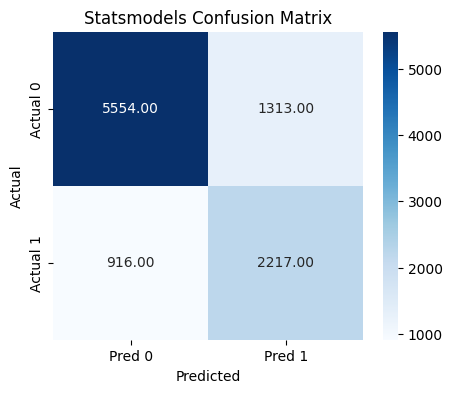

In [59]:
# Visualize the statsmodels confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

model_logit = logit(f'outcome ~ {best_feature}', data=cleaned_data).fit(disp=0)
conf_matrix = model_logit.pred_table()
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt='.2f', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Statsmodels Confusion Matrix')
plt.show()